In [1]:
"""
The HR department of a multinational company would like to understand the reasons for premature exit of experienced 
employees using Machine Learning techniques. For achieving this, they must:


Explore the dataset and check if the data can be used as-is.
Determine the relationship between satisfaction level and working hours of employees who have left the organization.
Effect of satisfaction level, department, promotion in last 5 years and salary level of employees who have left 
the organization.

Build  a machine learning model to predict  the exit of employees.

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

exiting_employees = pd.read_csv("../../datasets/HR_comma_sep.csv")

exiting_employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
'1 means employee left, 0 means employee stays'

exiting_employees['left'].unique()

array([1, 0])

In [3]:
'Determine the relationship between satisfaction level and working hours of employees who have left the organization.'

query = exiting_employees[(exiting_employees['left'] == 1)]
query['left'].unique()

array([1])

'Data shows clusters around high average monthly hours where satisfaction level is either very low or high\nAlso shows a cluster around average satisfaction and low monthly hours'

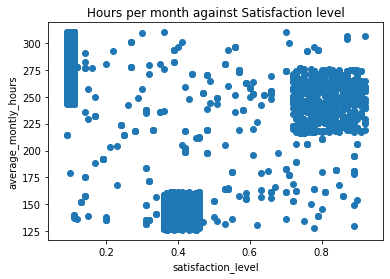

In [4]:
plt.scatter(query['satisfaction_level'], query['average_montly_hours'])
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.title('Hours per month against Satisfaction level')

"""Data shows clusters around high average monthly hours where satisfaction level is either very low or high
Also shows a cluster around average satisfaction and low monthly hours"""

In [5]:
"""Effect of satisfaction level, department, promotion in last 5 years and salary level of employees who have left 
the organization.
"""

dept_query = query.groupby('Department')['left'].sum()
dept_query

Department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64

'Data suggests Sales, Support and Technical departments contribute highly to the number of leaves'

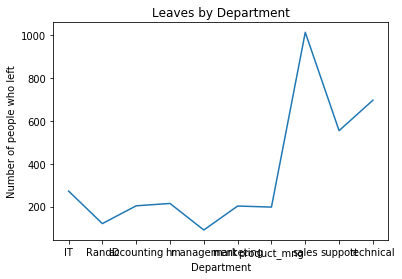

In [6]:
plt.plot(dept_query)
plt.xlabel('Department')
plt.ylabel('Number of people who left')
plt.title('Leaves by Department')

"""Data suggests Sales, Support and Technical departments contribute highly to the number of leaves"""

In [7]:
query.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
"""Effect of promotion in last 5 years and employees who have left the organization.
"""

prom_query = query.groupby('promotion_last_5years')['left'].sum()

prom_query

"""Almost everyone who left had not been promoted in the last 5 years"""

'Almost everyone who left had not been promoted in the last 5 years'

In [9]:
"""Effect of salary level of employees who have left the organization.
"""

salary_query = query.groupby('salary')['left'].sum()

salary_query

"""Very few people with a high salary left the organisation"""

'Very few people with a high salary left the organisation'

In [10]:
"""Effect of satisfaction level of employees who have left the organization.
"""

satisfaction_query = exiting_employees.groupby('left')['satisfaction_level']

satisfaction_query

In [11]:
"""Build  a machine learning model to predict  the exit of employees.
"""

model_variables = exiting_employees[['satisfaction_level','average_montly_hours','promotion_last_5years','Department', 
                                      'salary', 'left']]

model_variables.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department,salary,left
0,0.38,157,0,sales,low,1
1,0.80,262,0,sales,medium,1
2,0.11,272,0,sales,medium,1
3,0.72,223,0,sales,low,1
4,0.37,159,0,sales,low,1


In [12]:
x = model_variables[['satisfaction_level','average_montly_hours','promotion_last_5years']]
y = model_variables['left']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.67, random_state = 0)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

from sklearn.metrics import classification_report

test_predictions = model.predict(x_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3818
           1       0.81      0.82      0.82      1132

    accuracy                           0.92      4950
   macro avg       0.88      0.88      0.88      4950
weighted avg       0.92      0.92      0.92      4950



In [13]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_train, train_predictions)

train_confusion_matrix

array([[7475,  135],
       [ 199, 2240]])

In [14]:
train_accuracy = (train_confusion_matrix[0][0] + train_confusion_matrix[1][1])/ train_confusion_matrix.sum()
train_accuracy

0.966762861976316

In [15]:
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

test_confusion_matrix

array([[3604,  214],
       [ 204,  928]])

In [16]:
test_accuracy = (test_confusion_matrix[0][0] + test_confusion_matrix[1][1])/ test_confusion_matrix.sum()
test_accuracy

0.9155555555555556

In [17]:
"""Including categorical values - salary and department"""

x =  model_variables.columns.drop(["left"])
model_variables_encoded = pd.get_dummies(model_variables[x])

y = model_variables["left"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(model_variables_encoded, y, train_size = 0.67, random_state = 0)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

from sklearn.metrics import classification_report

test_predictions = model.predict(x_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3818
           1       0.81      0.86      0.84      1132

    accuracy                           0.92      4950
   macro avg       0.88      0.90      0.89      4950
weighted avg       0.92      0.92      0.92      4950



In [18]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_train, train_predictions)

train_confusion_matrix

array([[7598,   12],
       [  27, 2412]])

In [19]:
train_accuracy = (train_confusion_matrix[0][0] + train_confusion_matrix[1][1])/ train_confusion_matrix.sum()
train_accuracy

0.9961190168175937

In [20]:
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

test_confusion_matrix

array([[3588,  230],
       [ 153,  979]])

In [21]:
test_accuracy = (test_confusion_matrix[0][0] + test_confusion_matrix[1][1])/ test_confusion_matrix.sum()
test_accuracy

0.9226262626262626

In [22]:
model_variables_encoded.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,262,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,272,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,223,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,159,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [23]:
"""satisfaction_level = 0.12
average_montly_hours = 300
no promotion in past 5 years
department = sales
salary = low

employee left"""

model.predict([[0.12, 300, 0,0,0,0,0,0,0,0,1,0,0,0,1,0]])

array([1])

In [24]:
"""Employee stayed

satisfaction_level = 0.96
average_montly_hours = 250
promoted in past 5 years
department = IT
salary = high

employee stayed"""

model.predict([[0.96, 250, 1,1,0,0,0,0,0,0,0,0,0,1,0,0]])

array([0])

In [25]:
"""satisfaction_level = 0.12
average_montly_hours = 350
promoted in past 5 years
department = sales
salary = high

employee left"""

model.predict([[0.12, 350, 1,0,0,0,0,0,0,0,1,0,0,1,0,0]])

array([1])

In [26]:
"""satisfaction_level = 0.12
average_montly_hours = 250
promoted in past 5 years
department = sales
salary = high

employee stayed"""

model.predict([[0.12, 250, 1,0,0,0,0,0,0,0,1,0,0,1,0,0]])

array([0])

In [29]:
model_variables_encoded.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,157,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,262,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,272,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,223,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,159,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [41]:
x =  model_variables.columns.drop(["left"])
model_variables_encoded = pd.get_dummies(model_variables[x])

y = model_variables["left"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(model_variables_encoded, y, train_size = 0.67, random_state = 0)

from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier(n_estimators = 100).fit(x_train,y_train)

In [42]:
from sklearn.metrics import classification_report

test_predictions = randomforest_model.predict(x_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3818
           1       0.88      0.88      0.88      1132

    accuracy                           0.95      4950
   macro avg       0.92      0.92      0.92      4950
weighted avg       0.95      0.95      0.95      4950



In [43]:
train_predictions = randomforest_model.predict(x_train)
test_predictions = randomforest_model.predict(x_test)

from sklearn.metrics import confusion_matrix

train_confusion_matrix = confusion_matrix(y_train, train_predictions)

train_confusion_matrix

array([[7588,   22],
       [  17, 2422]])

In [44]:
train_accuracy = (train_confusion_matrix[0][0] + train_confusion_matrix[1][1])/ train_confusion_matrix.sum()
train_accuracy

0.9961190168175937

In [45]:
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

test_confusion_matrix

array([[3687,  131],
       [ 132, 1000]])

In [46]:
test_accuracy = (test_confusion_matrix[0][0] + test_confusion_matrix[1][1])/ test_confusion_matrix.sum()
test_accuracy

0.9468686868686869

In [ ]:
"""Could write up into document format the results of this.
How you went about understanding the data and how you prepared and applied models to the data.
"""